In [1]:
import matplotlib.pyplot as plt
import pandas
import datetime

def GAMA_time_to_datetime(input):
    dt_object = int(datetime.datetime.strptime(input[7:-11], '%Y-%m-%d').year)
    return(dt_object)

Index(['current_date', 'energy_expenses_hh'], dtype='object')


<Figure size 1600x1200 with 0 Axes>

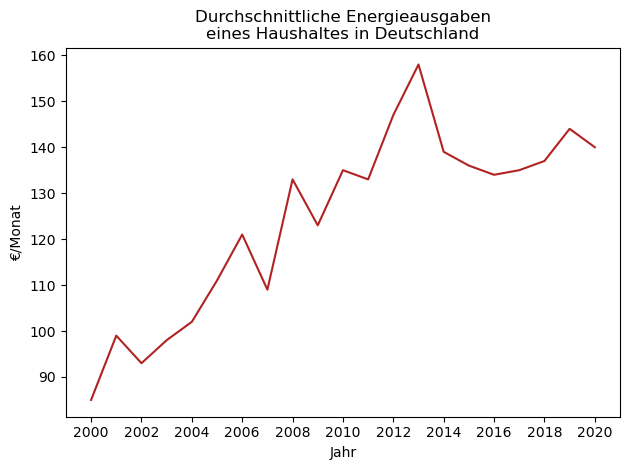

In [28]:

# historic energy expenses per household:
'''enthält Ausgaben eines Privathaushaltes für Energie (ohne Kraftstoff) in Deutschland in den Jahren 2000 bis 2020 (in Euro pro Monat)'''
df_expenses_historic = pandas.read_csv("energy-expenses_hh_2000-2020.csv")
df_expenses_historic = df_expenses_historic.rename(columns={'Year' : 'current_date'})

# plot:
plt.figure(figsize=(16,12))
df_expenses_historic.plot(
    kind='line',
    x='current_date',
    y=['energy_expenses_hh'],
    color='firebrick'
)
plt.title('Durchschnittliche Energieausgaben\neines Haushaltes in Deutschland')
plt.ylabel('€/Monat')
plt.xlabel('Jahr')
plt.xticks(range(2000, 2021, 2))
plt.gca().legend().remove()
plt.tight_layout()

In [6]:

# historic energy prices:
# load data, rename and drop last row:
df_energy_prices_historic = pandas.read_csv("../../data/data_pre-simulation/energy-prices_hh_2011-2022.csv")
df_energy_prices_historic.rename(
    columns={
        'Year' : 'current_date',
        'Power' : 'power_price',
        'Gas' : 'gas_price',
        'Oil' : 'oil_price'
        }, inplace=True)
df_energy_prices_historic = df_energy_prices_historic[df_energy_prices_historic['current_date'] < 2020]

# energy price prognosis:
df_energy_prices_prognosis = pandas.read_csv("../../data/precomputed/simulation_defaults/energy_prices/energy_prices_total.csv")  # load data
df_energy_prices_prognosis['current_date'] = df_energy_prices_prognosis['current_date'].apply(GAMA_time_to_datetime)  # convert date
# df_energy_prices_prognosis = df_energy_prices_prognosis.rename(columns={'Year' : 'current_date'})[2:]  # rename columns and drop first two lines
df_energy_prices_prognosis = df_energy_prices_prognosis[['current_date', 'power_price', 'gas_price', 'oil_price']]  # filter necessary columns
df_energy_prices_prognosis = df_energy_prices_prognosis[df_energy_prices_prognosis['current_date'] >= 2020]

# unify dataframes:
df_expenses = pandas.concat([df_energy_prices_historic, df_energy_prices_prognosis])


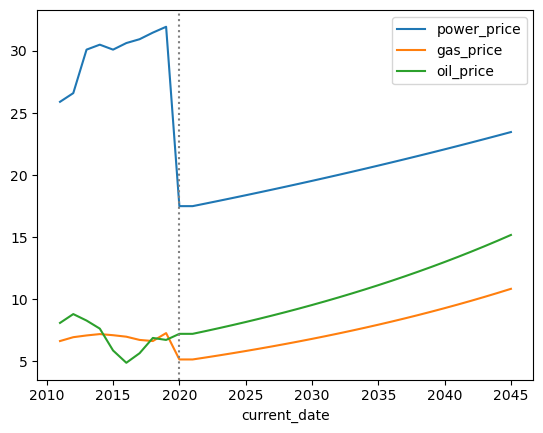

In [7]:
df_expenses.plot(
    kind='line',
    x='current_date',
    y=['power_price', 'gas_price', 'oil_price'],
)

# vertical line:
plt.axvline(x=2020, ymin=0, ymax=30, linestyle='dotted', color='gray')